## Installing required libraries

In [10]:
%pip install supervision ultralytics

Note: you may need to restart the kernel to use updated packages.


## Uninstalling wandb

In [11]:
!pip uninstall wandb --yes

## Importing libraries

In [12]:
import tensorflow as tf
from ultralytics import YOLO
import os
from random import sample
from IPython.display import display, Image

## Check for GPU availability

In [13]:
def check_gpu():
    if tf.test.gpu_device_name():
        print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
    else:
        print("No GPU devices found.")
        
check_gpu()

Default GPU Device: /device:GPU:0


In [14]:
!cp /kaggle/input/dataset/data.yaml /kaggle/working/data.yaml

In [15]:
%%writefile /kaggle/working/data.yaml
train: /kaggle/input/dataset/train
test: /kaggle/input/dataset/valid
val: /kaggle/input/dataset/test

nc: 3
names: ['crack', 'damaged roof', 'damaged paint']

roboflow:
  workspace: university-bswxt
  project: crack-bphdr
  version: 2
  license: Public Domain
  url: https://universe.roboflow.com/university-bswxt/crack-bphdr/dataset/2

Overwriting /kaggle/working/data.yaml


## Training the YOLO model

In [16]:
model = YOLO('yolov8s.pt')
# model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
data_yaml_path = '/kaggle/working/data.yaml'
epochs = 50

In [17]:
train_results = model.train(
    data = data_yaml_path,
    epochs = epochs 
)

Ultralytics YOLOv8.2.18 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

train: Scanning /kaggle/input/dataset/train/labels... 4003 images, 38 backgrounds, 0 corrupt: 100%|██████████| 4041/4041 [00:04<00:00, 823.57it/s] 

train: WARNING ⚠️ Cache directory /kaggle/input/dataset/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4893, len(boxes) = 5377. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/dataset/test/labels... 216 images, 5 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<00:00, 642.45it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dataset/test is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 148, len(boxes) = 339. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.83G      1.589      2.365      1.611         20        640: 100%|██████████| 253/253 [01:18<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]

                   all        221        339      0.617      0.101     0.0638     0.0203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.91G      1.649      2.144      1.657         34        640: 100%|██████████| 253/253 [01:15<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.95it/s]

                   all        221        339      0.104      0.138     0.0592      0.021



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.95G      1.622      2.086      1.644         24        640: 100%|██████████| 253/253 [01:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.80it/s]

                   all        221        339      0.129      0.151     0.0859     0.0314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       4.9G      1.541          2       1.59         21        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.11it/s]

                   all        221        339      0.154      0.136      0.098     0.0376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.93G       1.48      1.933      1.556         37        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]

                   all        221        339      0.168      0.128      0.107     0.0501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.92G      1.422      1.855      1.517         18        640: 100%|██████████| 253/253 [01:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.18it/s]

                   all        221        339      0.192      0.149      0.128     0.0606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.92G      1.377      1.815      1.472         20        640: 100%|██████████| 253/253 [01:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.01it/s]

                   all        221        339      0.176      0.157      0.141     0.0708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       4.9G      1.339      1.782       1.46         25        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.13it/s]

                   all        221        339      0.208      0.158      0.141     0.0611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.95G      1.326      1.773      1.464         31        640: 100%|██████████| 253/253 [01:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.00it/s]

                   all        221        339      0.189      0.161      0.142     0.0607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.92G      1.294      1.724      1.436         25        640: 100%|██████████| 253/253 [01:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.04it/s]

                   all        221        339       0.17      0.179      0.162     0.0826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.93G      1.252      1.693      1.419         23        640: 100%|██████████| 253/253 [01:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]

                   all        221        339       0.24      0.163      0.158     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.89G      1.251       1.69      1.413         22        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.21it/s]

                   all        221        339       0.29      0.129      0.165     0.0913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.95G       1.24      1.652      1.402         20        640: 100%|██████████| 253/253 [01:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.07it/s]

                   all        221        339      0.737      0.163      0.167      0.089



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.91G      1.225       1.65      1.396         26        640: 100%|██████████| 253/253 [01:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.99it/s]

                   all        221        339      0.251      0.179      0.168     0.0907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.91G      1.217      1.636      1.387         25        640: 100%|██████████| 253/253 [01:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.05it/s]

                   all        221        339      0.308      0.176      0.191      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.89G       1.19      1.594      1.373         21        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.13it/s]

                   all        221        339      0.265        0.2        0.2      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.93G      1.189      1.587      1.369         22        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.07it/s]

                   all        221        339      0.232      0.185      0.187      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.92G      1.164      1.552      1.359         26        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.14it/s]

                   all        221        339      0.761      0.189      0.191      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.92G      1.139       1.51      1.339         31        640: 100%|██████████| 253/253 [01:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.99it/s]

                   all        221        339      0.277      0.201      0.195      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.88G      1.138      1.533       1.34         31        640: 100%|██████████| 253/253 [01:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.79it/s]

                   all        221        339      0.275      0.195      0.202      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.93G      1.124      1.519      1.343         31        640: 100%|██████████| 253/253 [01:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.89it/s]

                   all        221        339      0.247      0.186      0.189      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.92G      1.118      1.513      1.333         26        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]

                   all        221        339      0.256      0.228      0.215      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.92G      1.111      1.473      1.321         27        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.10it/s]

                   all        221        339      0.275       0.21       0.21      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.89G      1.115      1.484      1.319         33        640: 100%|██████████| 253/253 [01:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.09it/s]

                   all        221        339      0.751      0.222      0.207      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.93G      1.078      1.449      1.301         20        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.04it/s]

                   all        221        339      0.749      0.214      0.207      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       4.9G      1.089      1.467      1.305         22        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.12it/s]

                   all        221        339      0.297      0.209      0.215      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.91G      1.082      1.435      1.297         22        640: 100%|██████████| 253/253 [01:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.12it/s]

                   all        221        339      0.273      0.217      0.207      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.88G       1.06      1.419      1.292         27        640: 100%|██████████| 253/253 [01:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.19it/s]

                   all        221        339      0.275      0.217      0.214       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.93G      1.067      1.423      1.295         24        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.85it/s]

                   all        221        339      0.324      0.196      0.213      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.92G      1.064      1.406       1.29         26        640: 100%|██████████| 253/253 [01:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.17it/s]

                   all        221        339      0.271      0.209      0.226      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.91G       1.04      1.379      1.278         24        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.08it/s]

                   all        221        339      0.288      0.238      0.232      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.89G      1.029      1.357      1.267         16        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.18it/s]

                   all        221        339      0.276      0.226      0.225      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.94G      1.028      1.353      1.268         21        640: 100%|██████████| 253/253 [01:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.05it/s]

                   all        221        339      0.823      0.215      0.246      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.93G      1.031      1.363       1.27         22        640: 100%|██████████| 253/253 [01:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]

                   all        221        339      0.839      0.203      0.229      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.92G      1.011      1.334      1.261         23        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.10it/s]

                   all        221        339      0.771      0.222      0.225       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       4.9G      1.008      1.322      1.249         31        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.01it/s]

                   all        221        339      0.791      0.216       0.23      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.93G      1.002      1.314      1.249         29        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.15it/s]

                   all        221        339      0.813      0.229      0.244      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.91G     0.9883      1.314      1.246         20        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.89it/s]

                   all        221        339      0.775      0.237      0.238       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.93G     0.9902      1.309      1.247         28        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.01it/s]

                   all        221        339      0.809      0.226      0.241      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.89G     0.9768      1.282      1.247         20        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]

                   all        221        339      0.507      0.948      0.743      0.392


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.93G     0.9635      1.005      1.271         11        640: 100%|██████████| 253/253 [01:15<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.16it/s]

                   all        221        339      0.796      0.231      0.244      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.92G     0.9298     0.9429       1.25         13        640: 100%|██████████| 253/253 [01:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.08it/s]

                   all        221        339      0.845      0.224      0.257      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.93G     0.9169      0.921      1.244          9        640: 100%|██████████| 253/253 [01:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.10it/s]

                   all        221        339      0.336      0.212      0.255      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.89G     0.9042     0.9012      1.238         10        640: 100%|██████████| 253/253 [01:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.09it/s]

                   all        221        339      0.835      0.232      0.503      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.93G     0.8866     0.8847      1.222         13        640: 100%|██████████| 253/253 [01:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.08it/s]

                   all        221        339      0.798      0.244      0.333      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.91G     0.8808     0.8601      1.225         11        640: 100%|██████████| 253/253 [01:14<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.07it/s]

                   all        221        339      0.849      0.222      0.505      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.91G     0.8626     0.8403      1.206         12        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.98it/s]

                   all        221        339      0.831      0.216      0.419      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.88G     0.8502     0.8247      1.206         12        640: 100%|██████████| 253/253 [01:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.00it/s]

                   all        221        339      0.895      0.213      0.326      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.94G     0.8476     0.8085      1.202         11        640: 100%|██████████| 253/253 [01:14<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.04it/s]

                   all        221        339      0.804      0.244      0.301      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.92G     0.8315     0.7986      1.191         12        640: 100%|██████████| 253/253 [01:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]

                   all        221        339      0.822      0.235       0.32      0.182



50 epochs completed in 1.078 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.18 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]


                   all        221        339      0.507      0.948      0.743      0.391
                 crack        221        338     0.0144      0.896      0.492      0.285
          damaged roof        221          1          1          1      0.995      0.497
Speed: 0.1ms preprocess, 4.6ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train2


In [39]:
!zip -r custom_yolo_model.zip /kaggle/working/runs/detect/train2/weights

  adding: kaggle/working/runs/detect/train2/weights/ (stored 0%)
  adding: kaggle/working/runs/detect/train2/weights/last.pt (deflated 8%)
  adding: kaggle/working/runs/detect/train2/weights/best.pt (deflated 8%)


In [40]:
import os
len(os.listdir('/kaggle/input/dataset/train/images'))

4041

In [41]:
len(os.listdir('/kaggle/input/dataset/test/images'))

221

In [42]:
len(os.listdir('/kaggle/input/dataset/valid/images'))

308

## Downloading the trained model

In [43]:
from IPython.display import FileLink
FileLink('custom_yolo_model.zip')

/kaggle/working/custom_yolo_model.zip

## Display image results to get AP for each class

### Confusion Matrix
[Confusion Matrix](https://h2o.ai/wiki/confusion-matrix/_jcr_content/root/section/par/advancedcolumncontro_1271832721/columns1/image.coreimg.jpeg/1689866291131/confusion-matrix.jpeg)
<img src="https://h2o.ai/wiki/confusion-matrix/_jcr_content/root/section/par/advancedcolumncontro_1271832721/columns1/image.coreimg.jpeg/1689866291131/confusion-matrix.jpeg" />

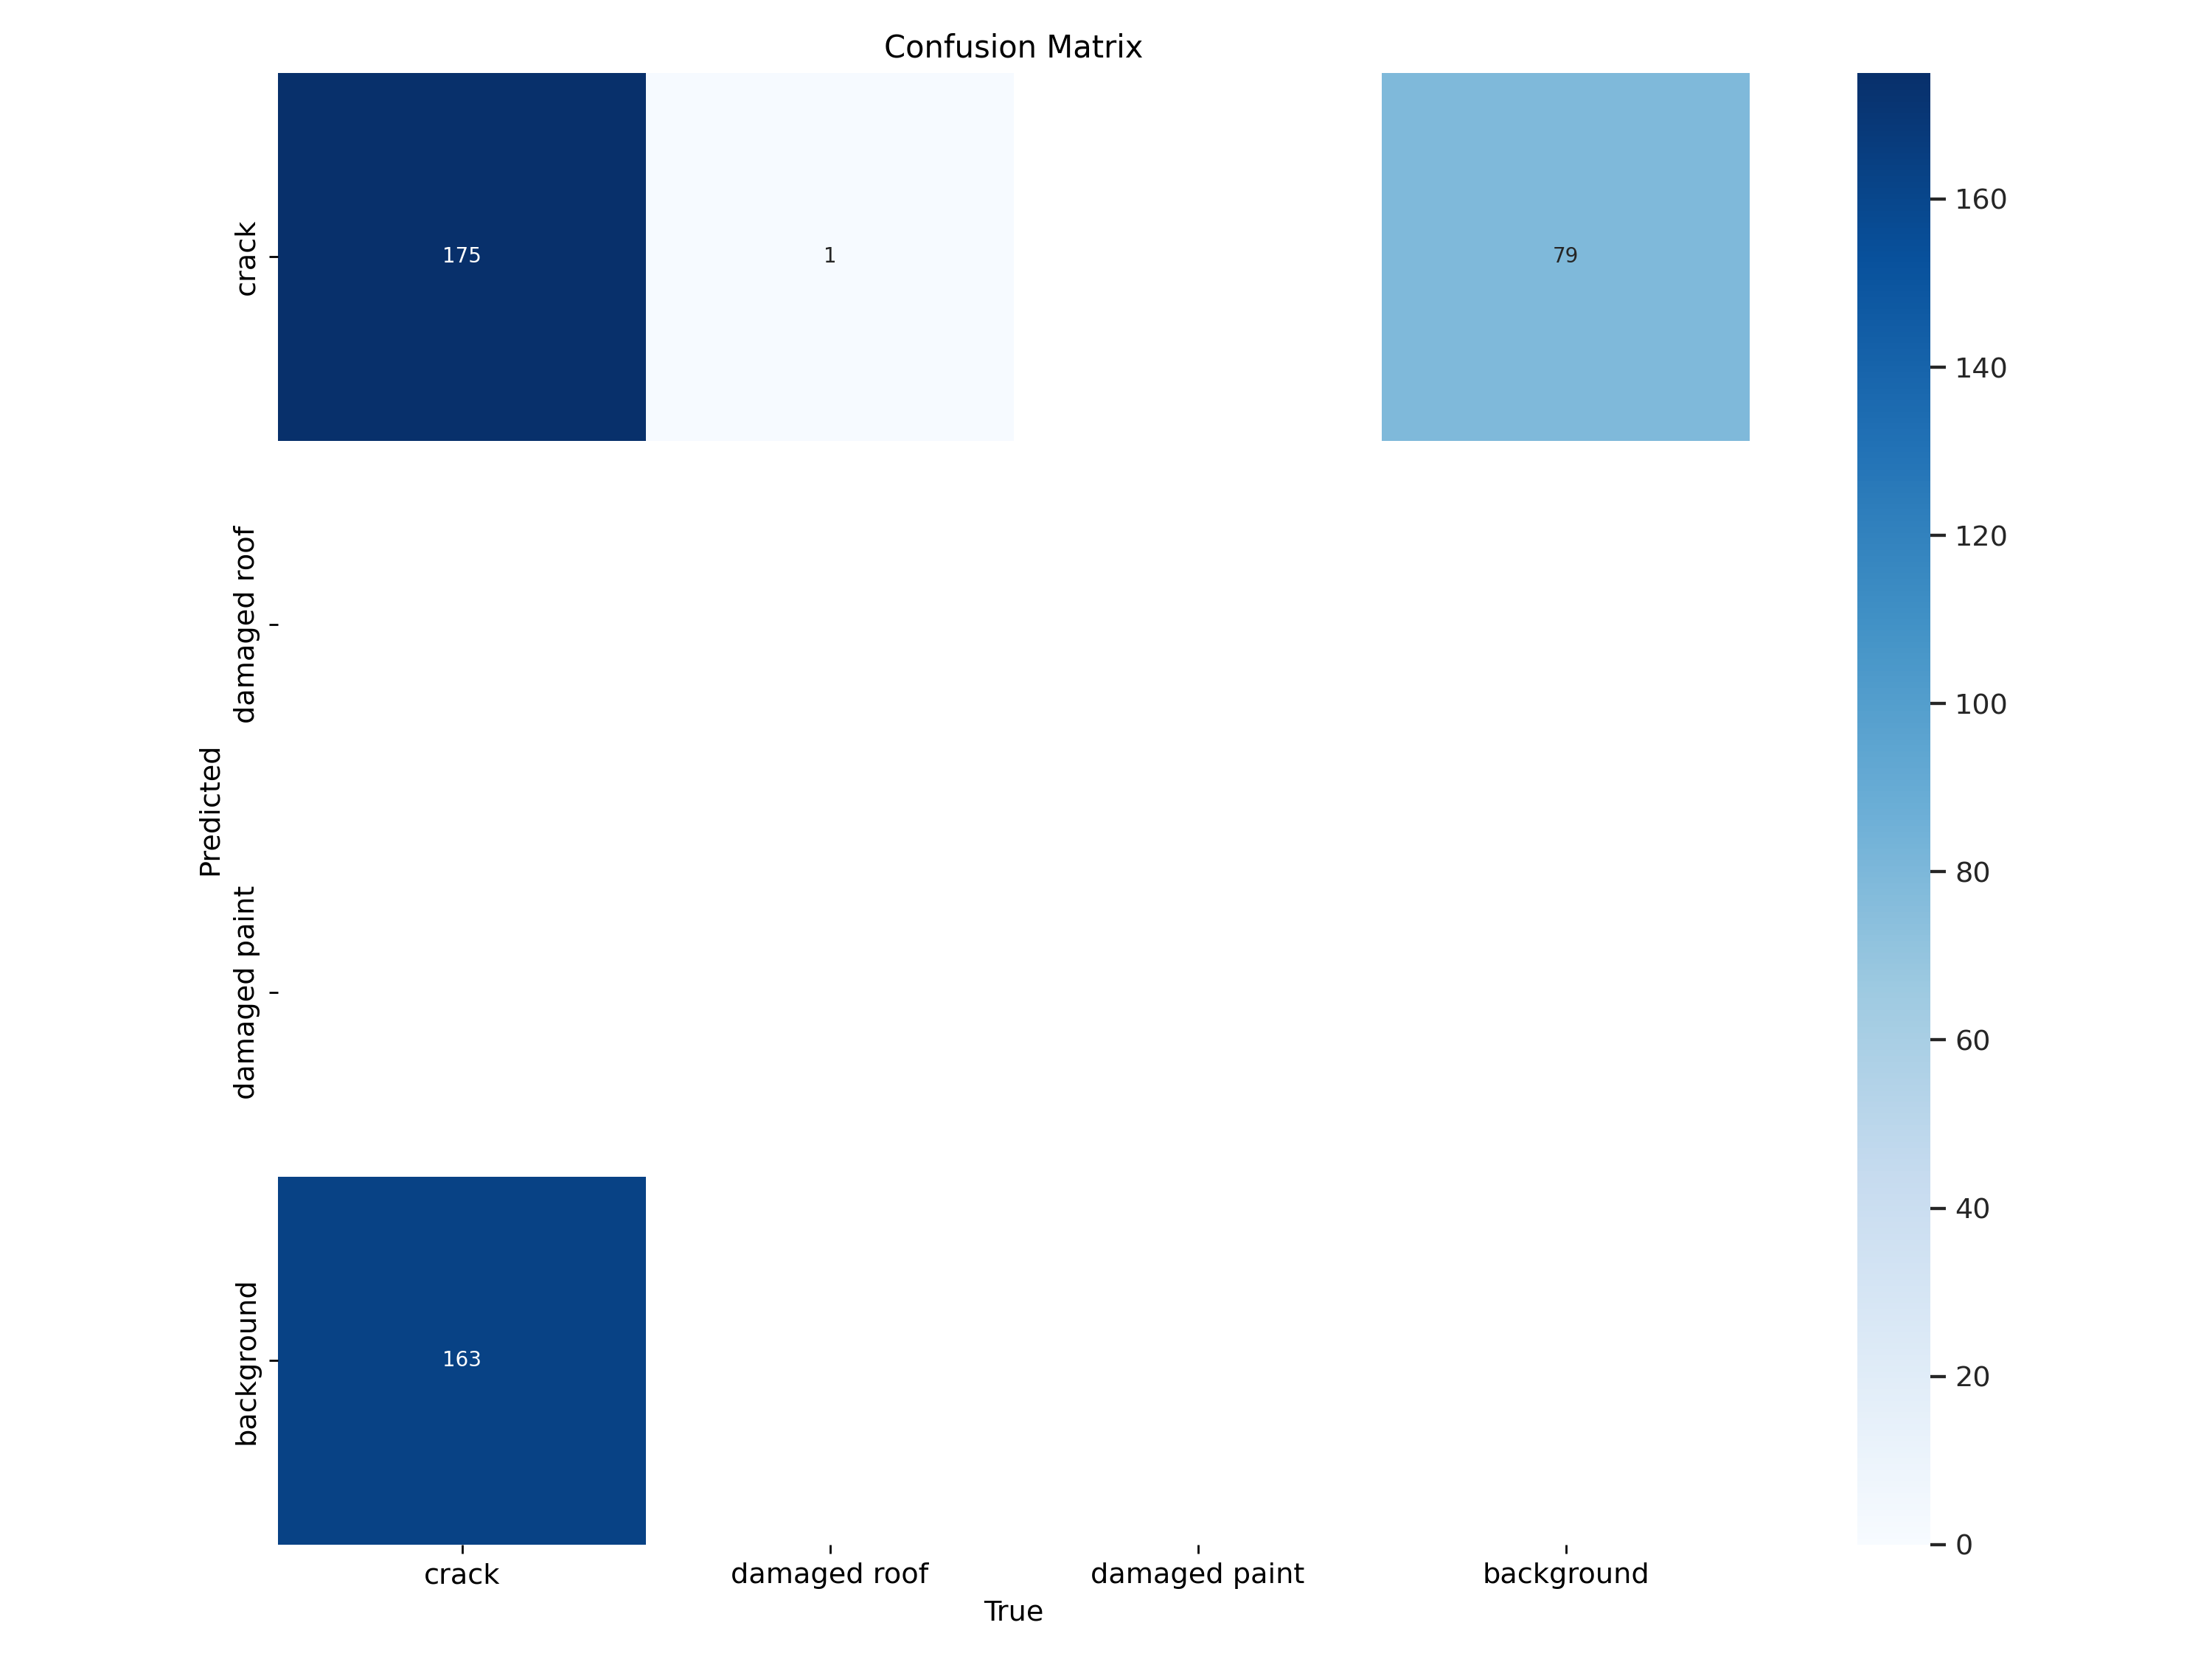

In [49]:
from IPython.display import Image, display
display(Image(filename='/kaggle/working/runs/detect/train/confusion_matrix.png', height=1000, width=1000))

### Training Results

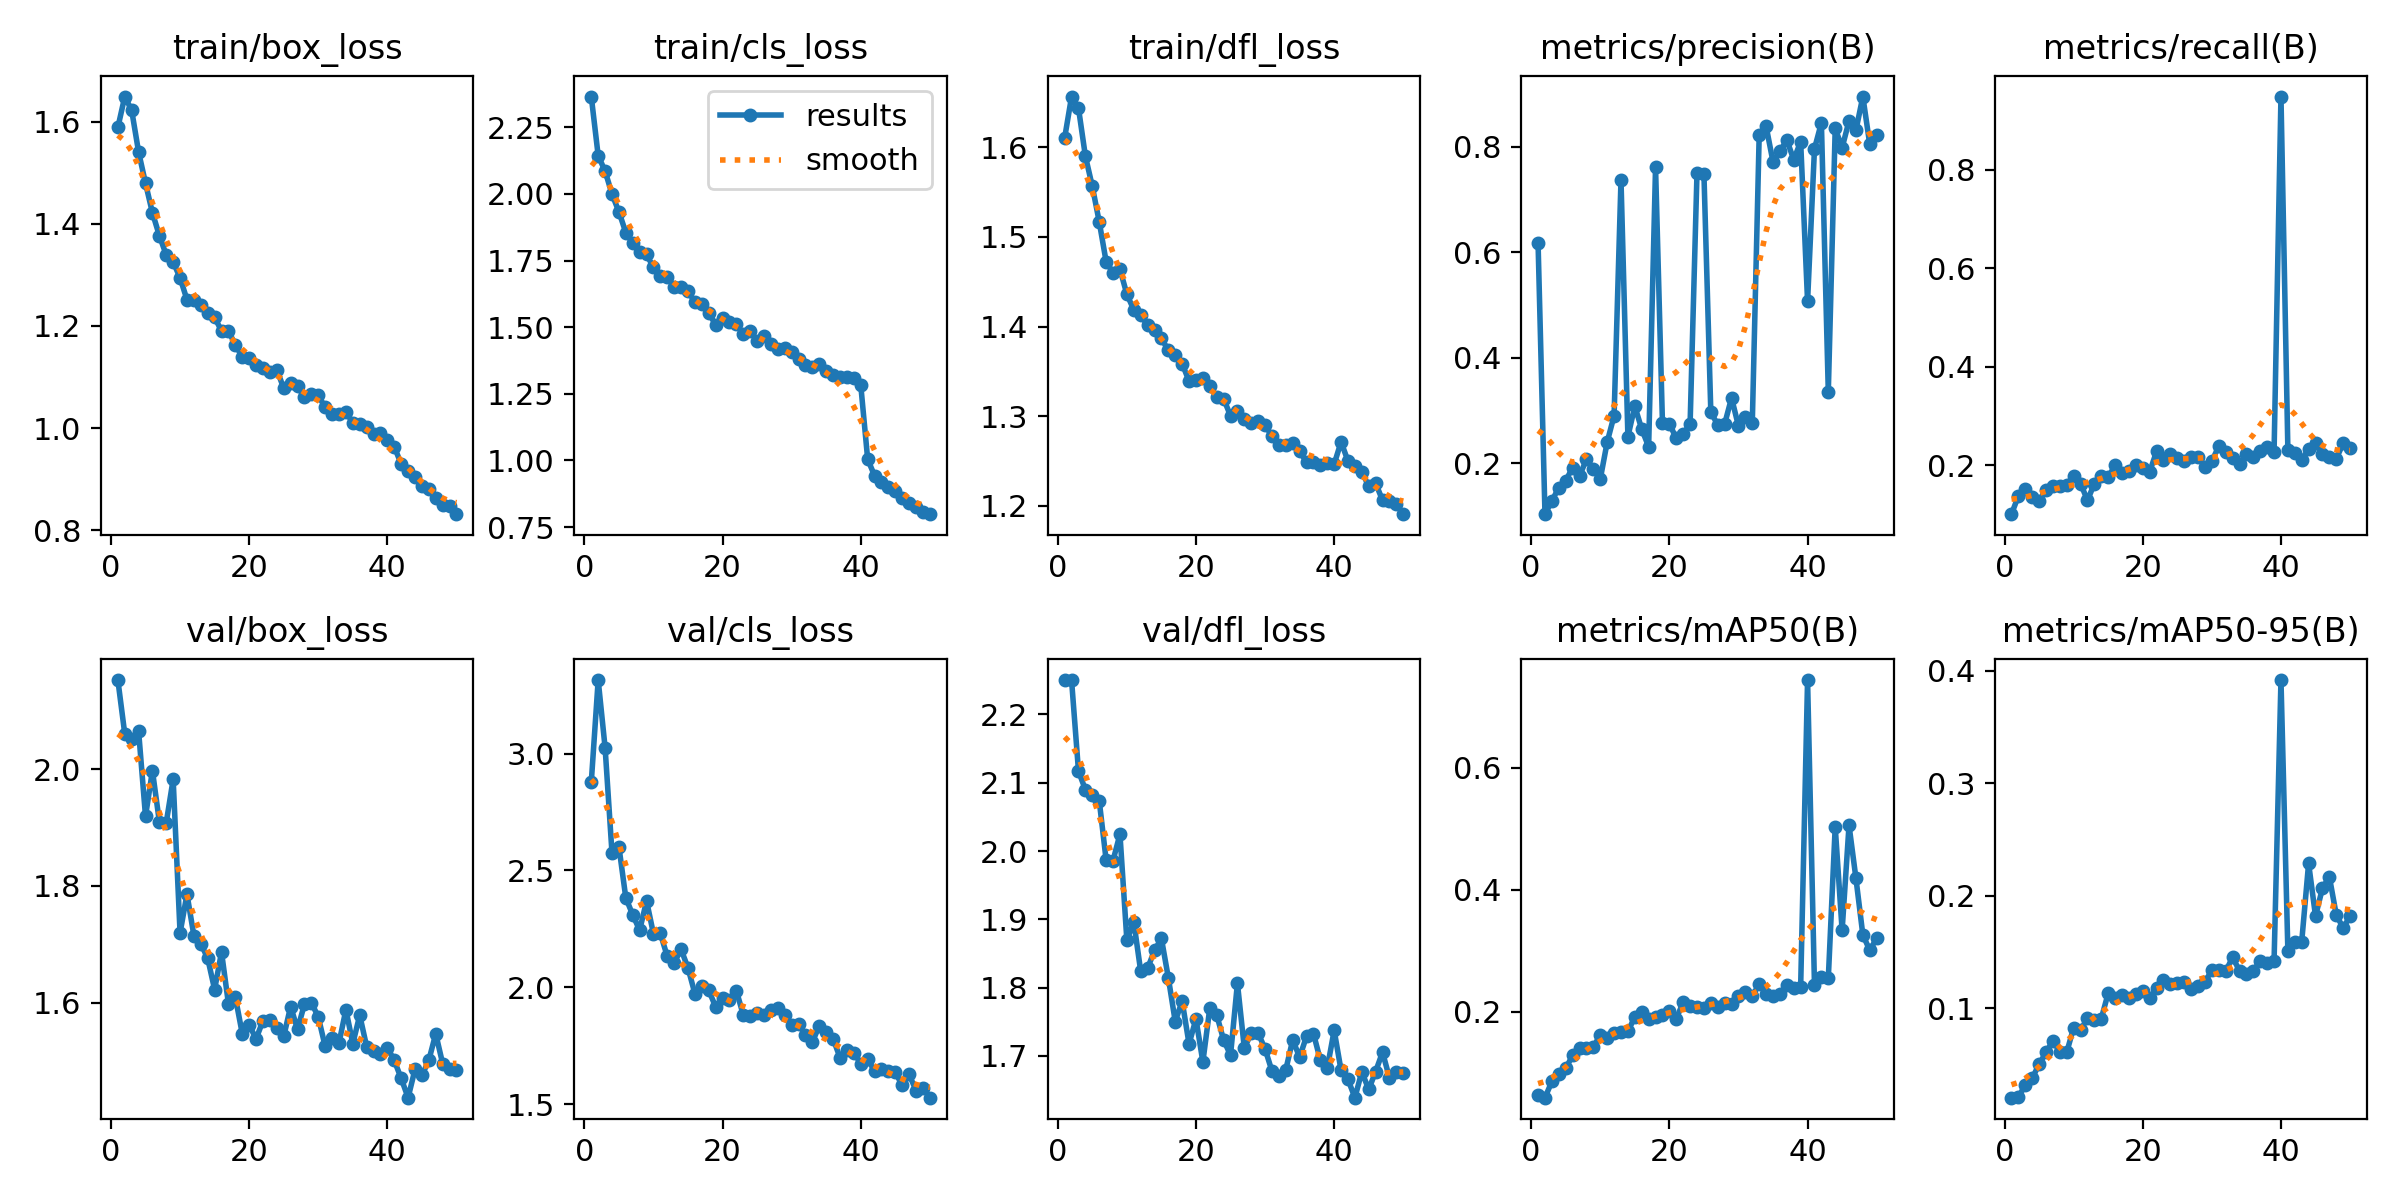

In [50]:
display(Image(filename='/kaggle/working/runs/detect/train/results.png', height=1000, width=1000))

In [51]:
import pandas as pd
pd.read_csv("/kaggle/working/runs/detect/train/results.csv")

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.58890,2.36540,1.6106,0.61712,0.10059,0.06376,0.02028,2.1527,2.8769,2.2503,0.000474,0.000474,0.000474
1,2,1.64930,2.14350,1.6566,0.10384,0.13757,0.05921,0.02102,2.0602,3.3144,2.2497,0.000932,0.000932,0.000932
2,3,1.62220,2.08570,1.6436,0.12890,0.15089,0.08585,0.03140,2.0511,3.0252,2.1169,0.001371,0.001371,0.001371
3,4,1.54070,1.99960,1.5900,0.15425,0.13609,0.09798,0.03758,2.0651,2.5741,2.0898,0.001344,0.001344,0.001344
4,5,1.47950,1.93280,1.5564,0.16750,0.12818,0.10731,0.05006,1.9191,2.6014,2.0816,0.001316,0.001316,0.001316
5,6,1.42170,1.85510,1.5169,0.19179,0.14941,0.12835,0.06060,1.9974,2.3819,2.0738,0.001288,0.001288,0.001288
6,7,1.37710,1.81510,1.4724,0.17560,0.15680,0.14058,0.07085,1.9102,2.3099,1.9867,0.001259,0.001259,0.001259
7,8,1.33900,1.78170,1.4599,0.20841,0.15828,0.14064,0.06108,1.9083,2.2438,1.9861,0.001231,0.001231,0.001231
8,9,1.32550,1.77290,1.4639,0.18886,0.16073,0.14235,0.06074,1.9825,2.3695,2.0246,0.001203,0.001203,0.001203
9,10,1.29420,1.72440,1.4361,0.17025,0.17899,0.16184,0.08261,1.7193,2.2285,1.8695,0.001174,0.001174,0.001174


## F1 Curve

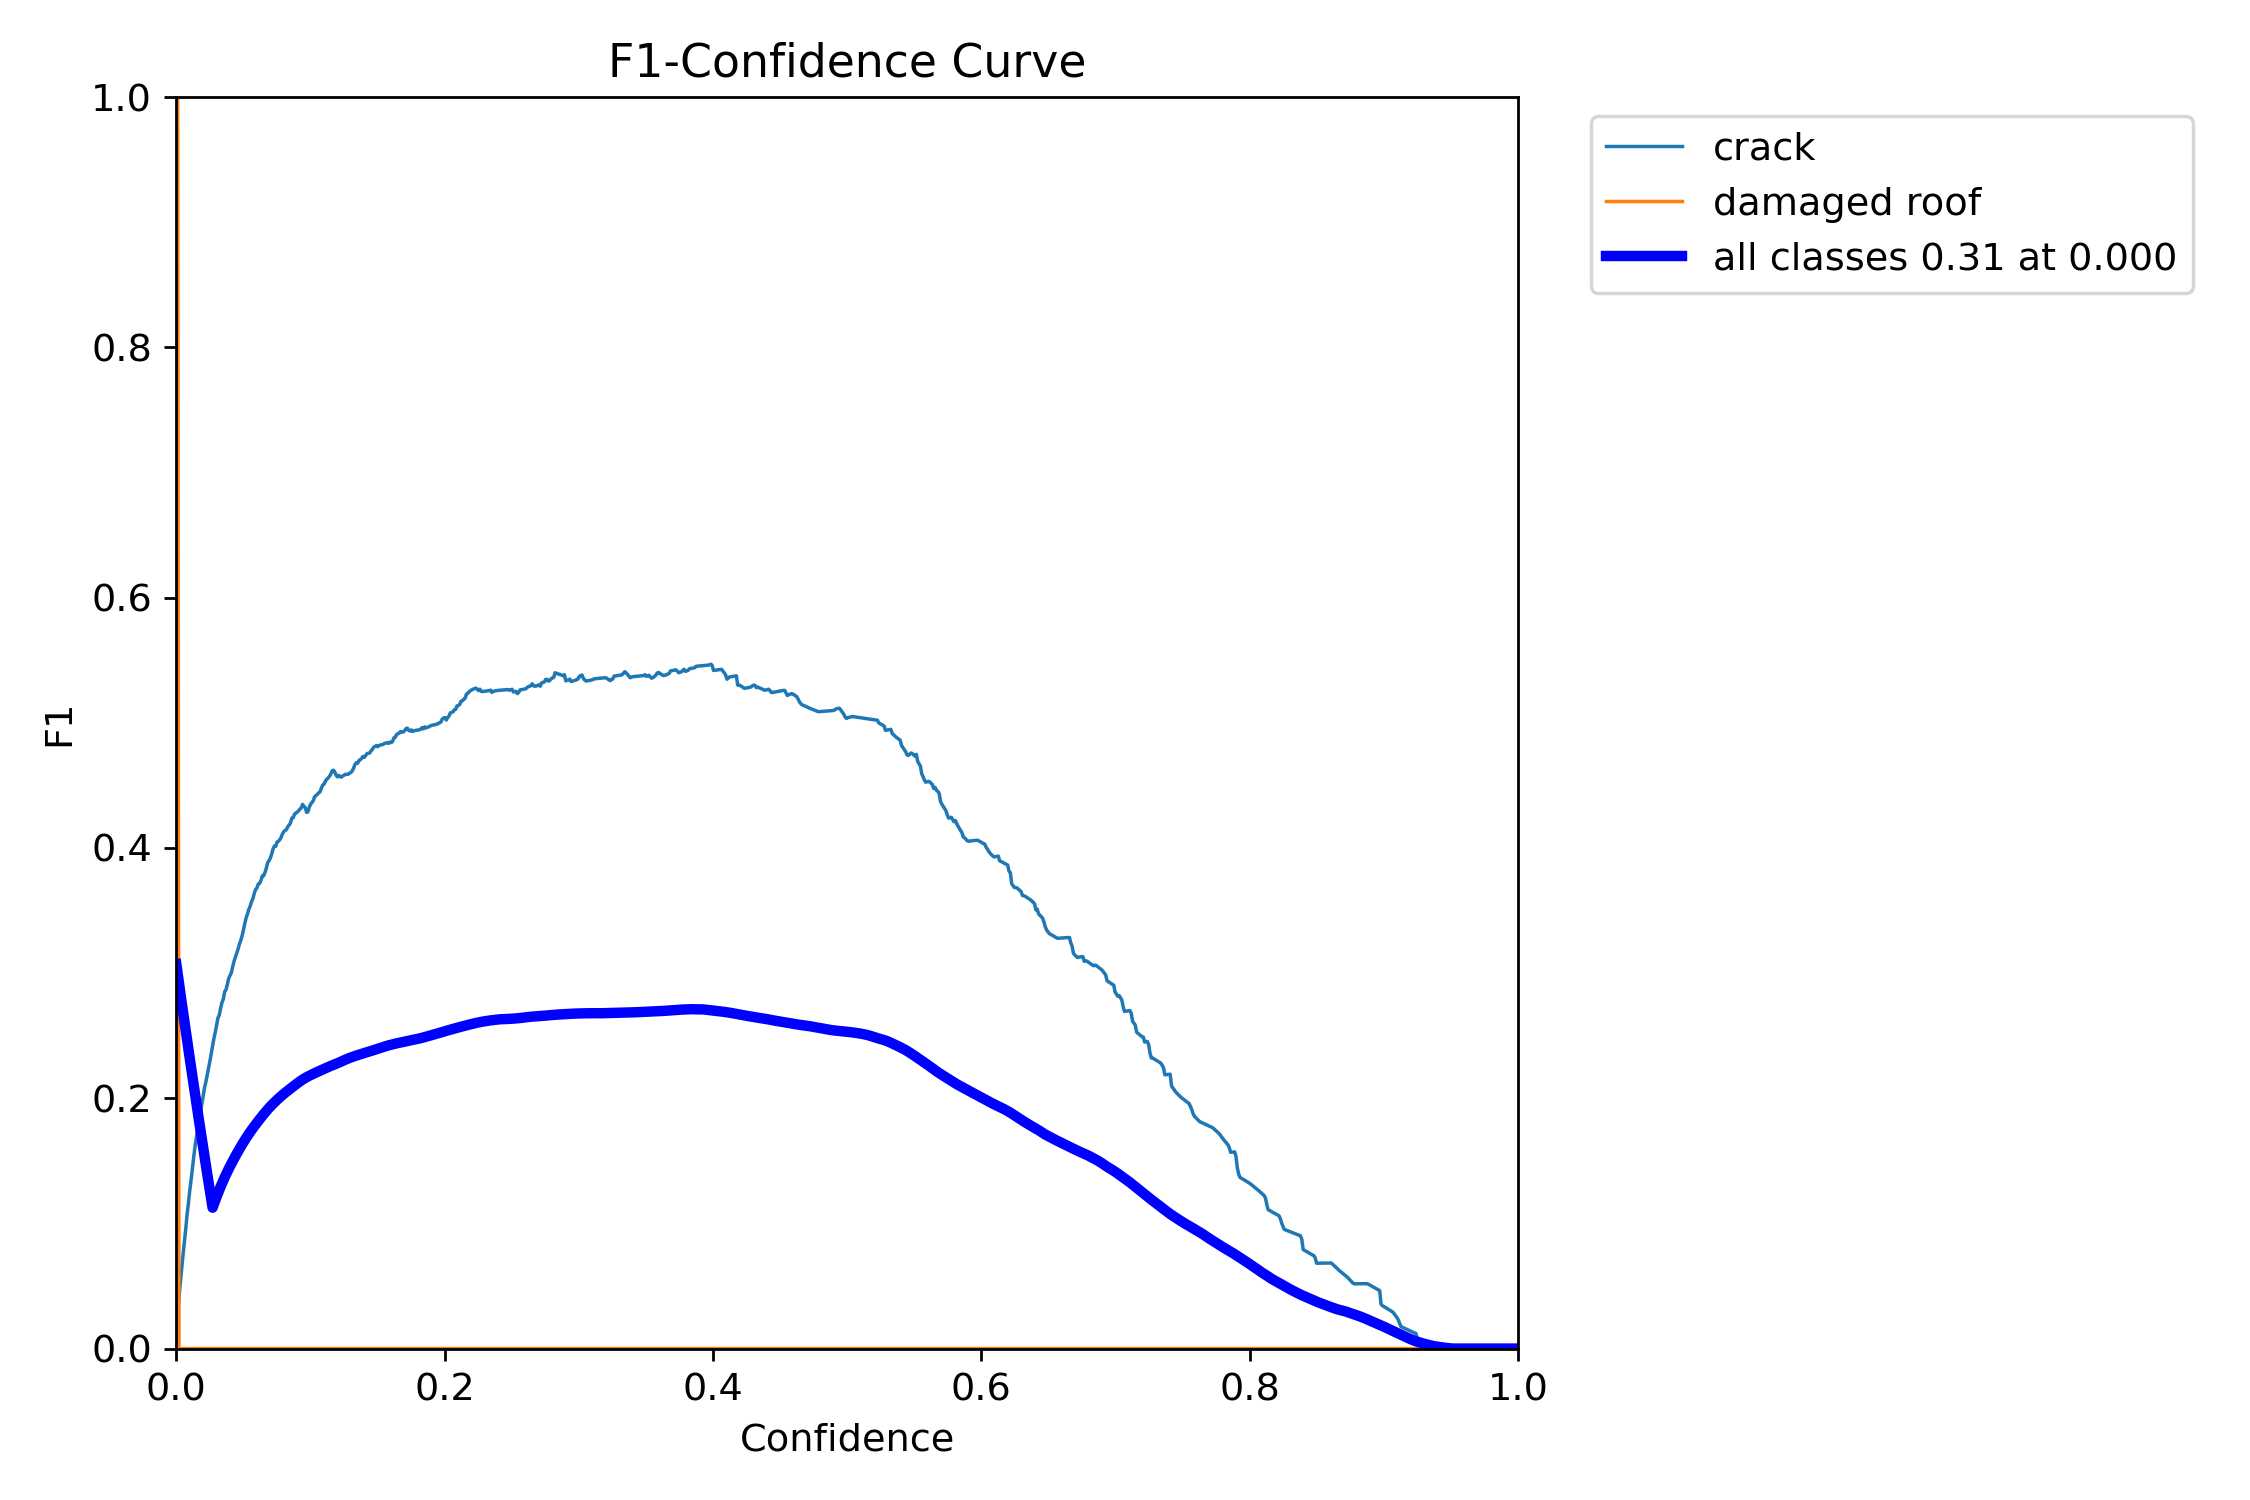

In [52]:
display(Image(filename='/kaggle/working/runs/detect/train/F1_curve.png', height=1000, width=1000))

## Precision-Recall Curve

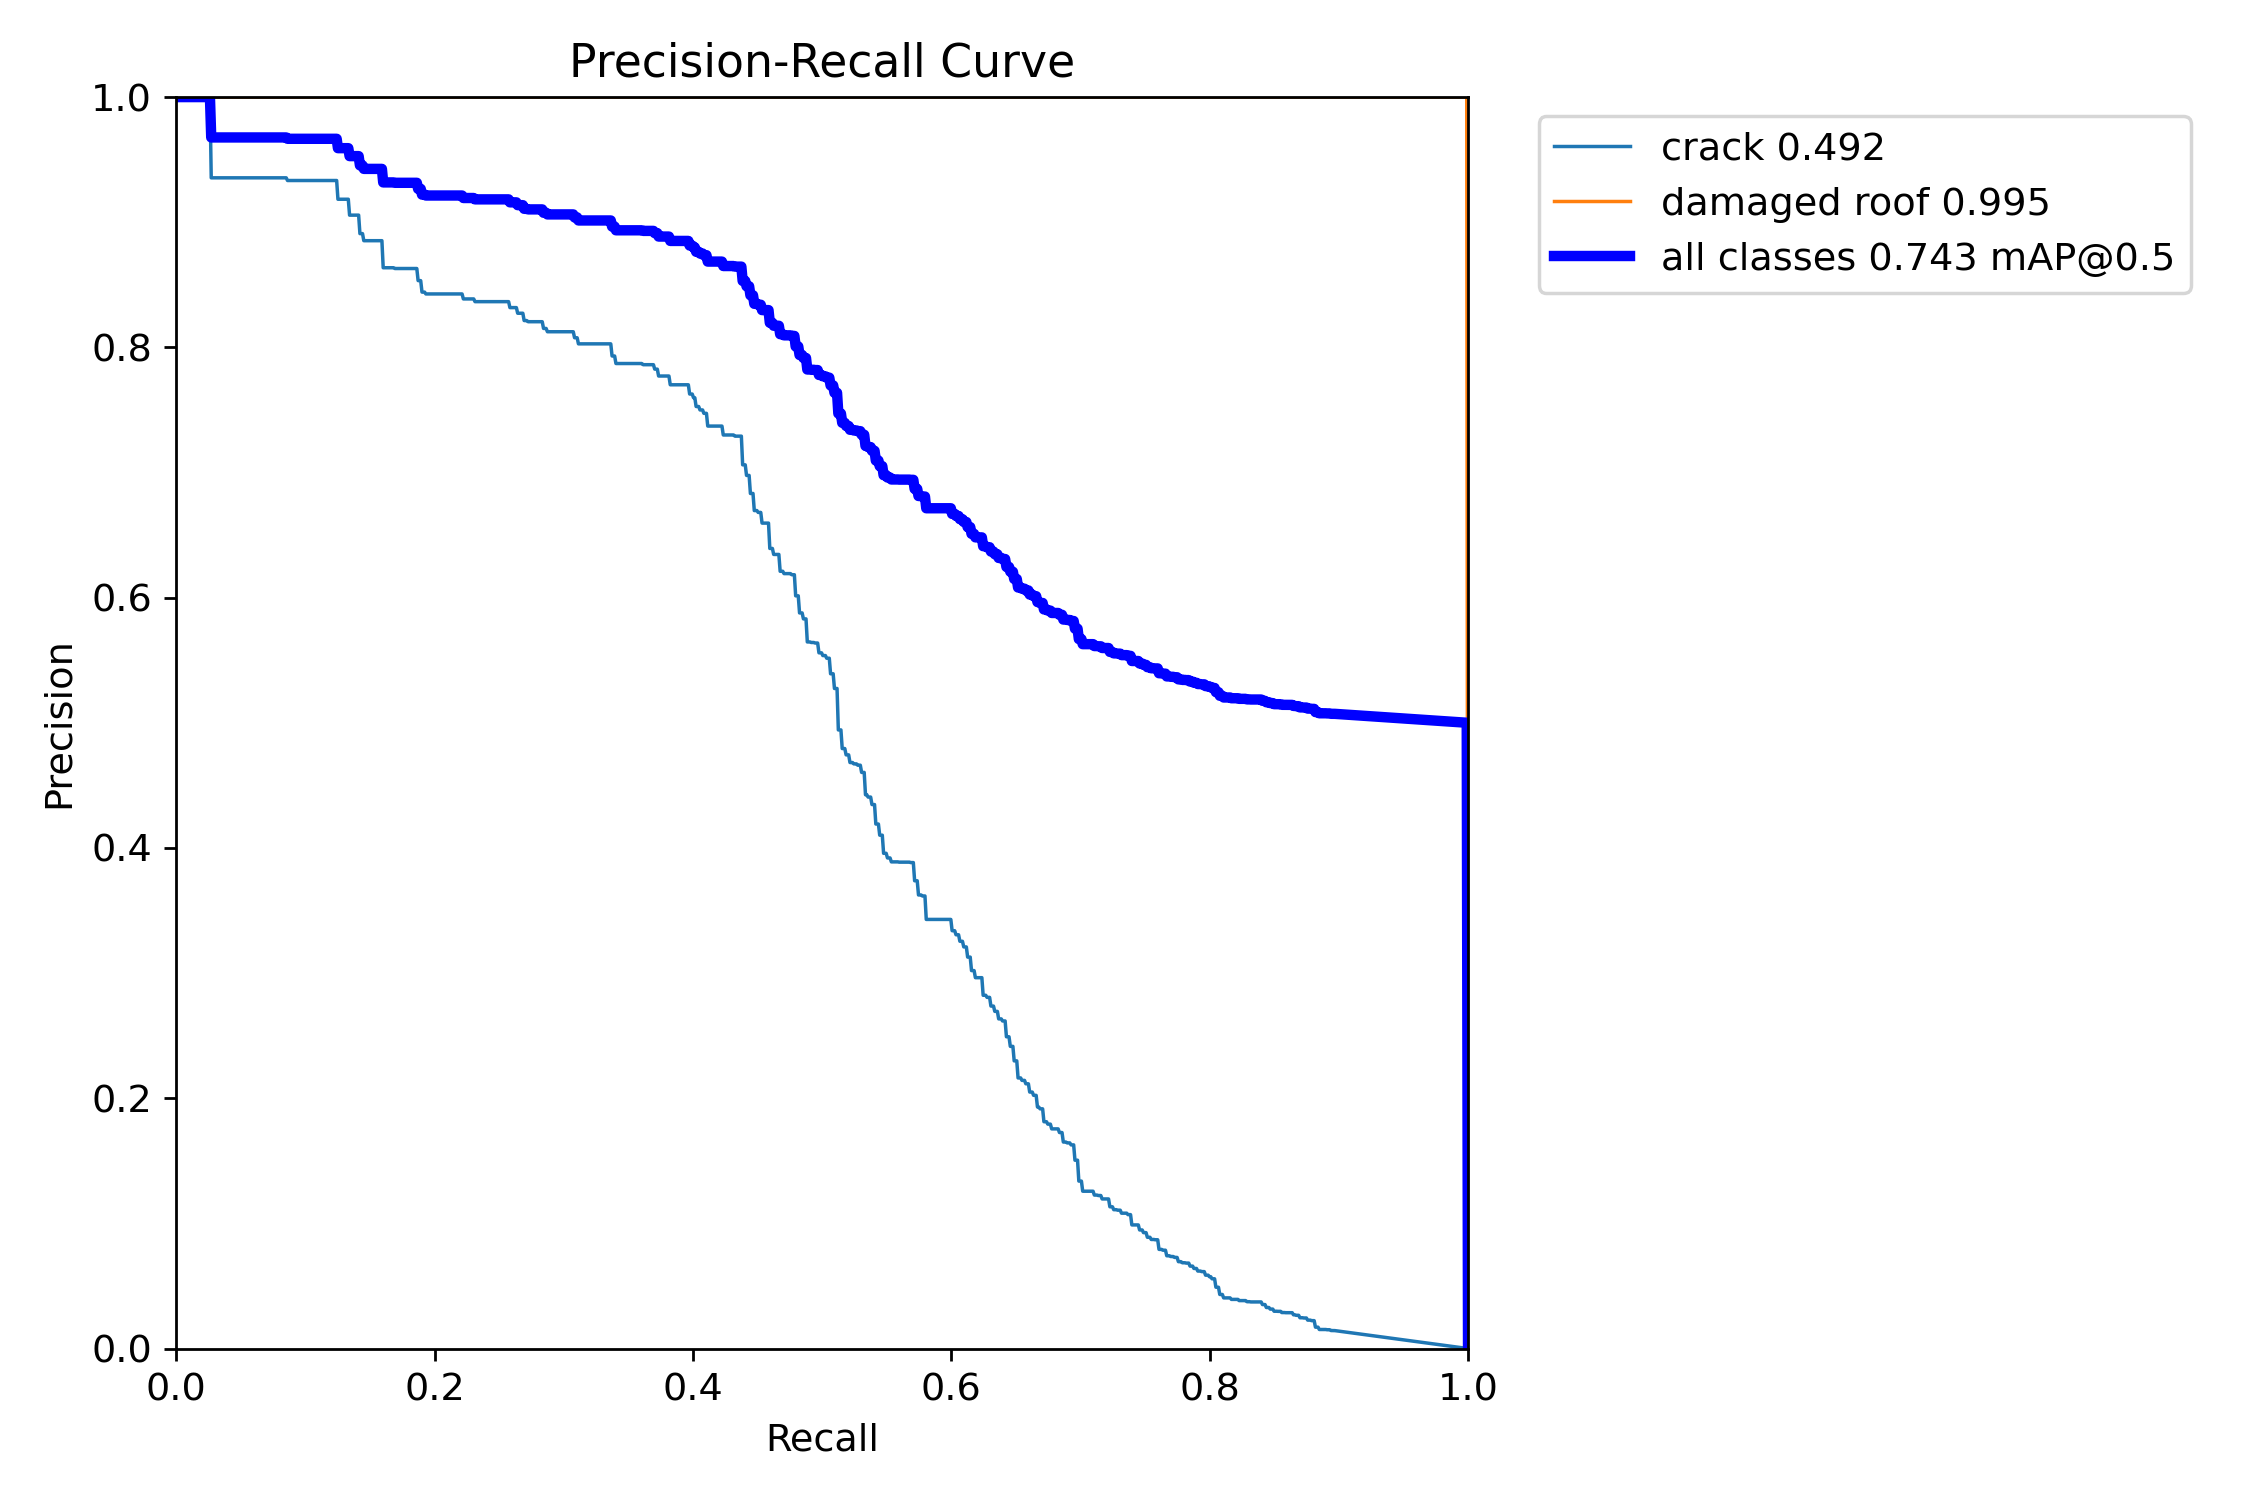

In [53]:
display(Image(filename='/kaggle/working/runs/detect/train/PR_curve.png', height=1000, width=1000))

## Sample detections on the train set

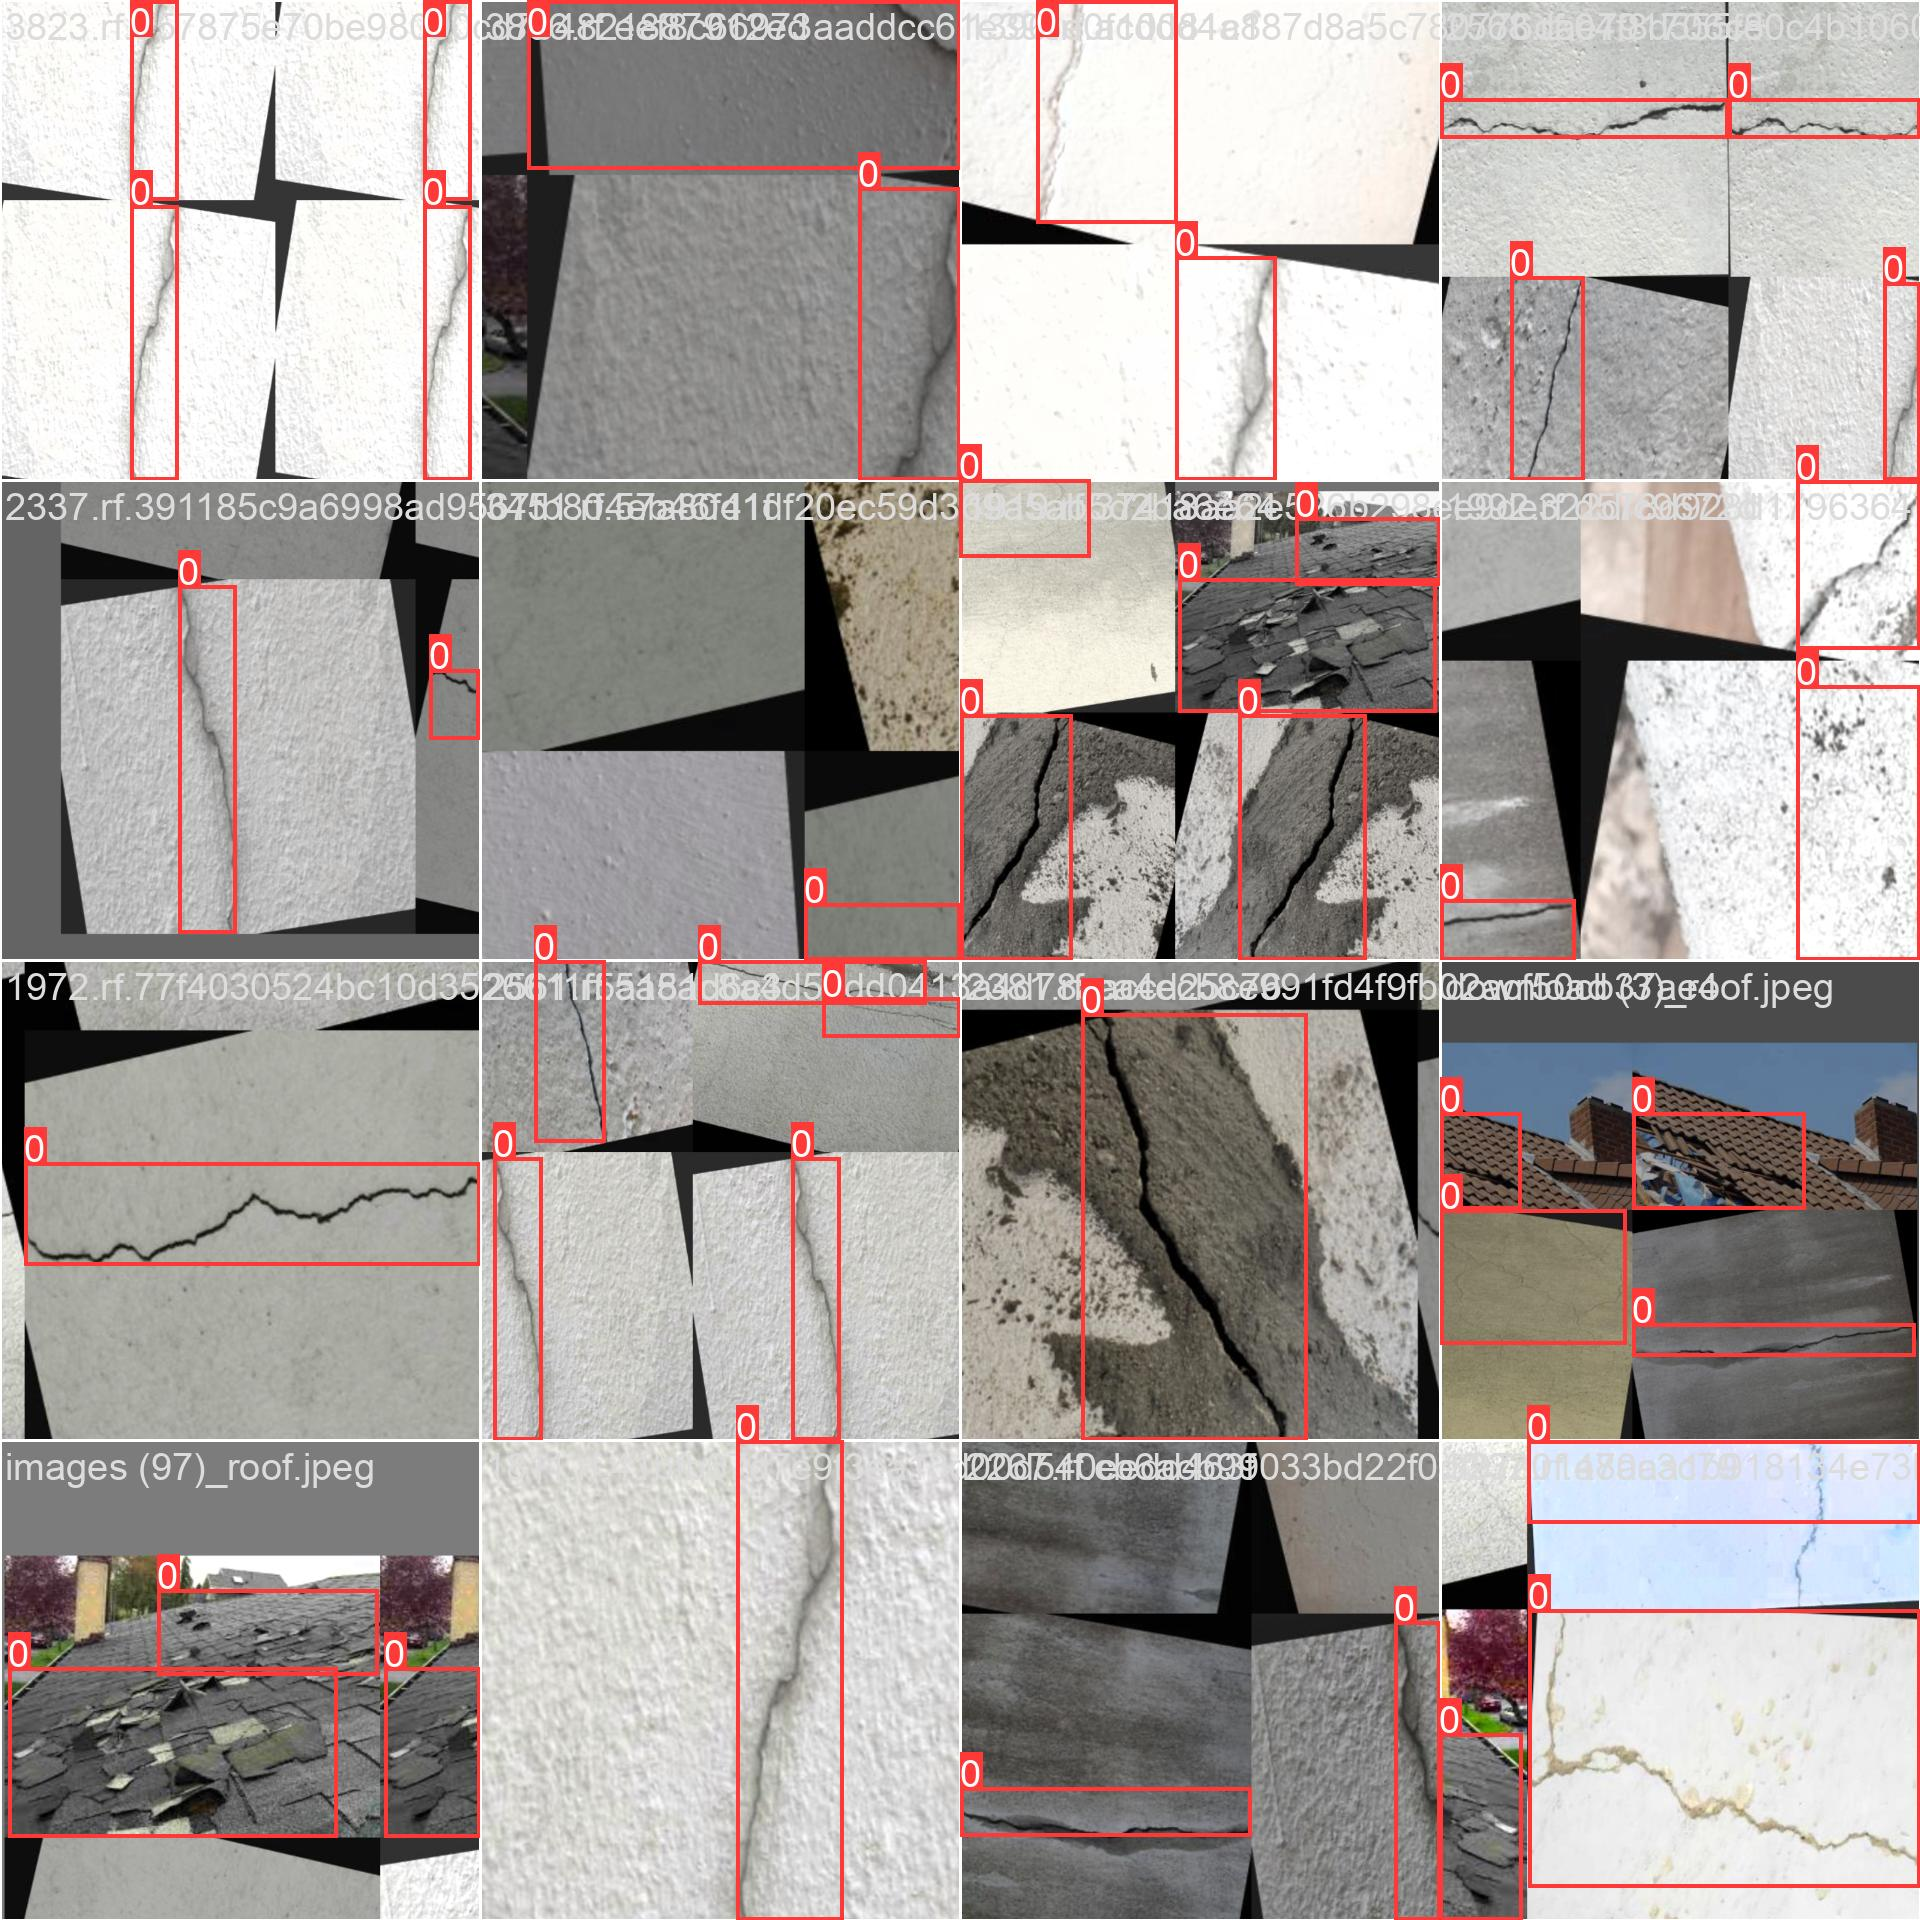

In [54]:
display(Image(filename='/kaggle/working/runs/detect/train/train_batch0.jpg', height=1000, width=1000))

## Validation Results

### 0.25 confidence threshold

In [55]:
val_25_results = model.val(
    data = data_yaml_path,
    conf = 0.25
)

Ultralytics YOLOv8.2.18 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


val: Scanning /kaggle/input/dataset/test/labels... 216 images, 5 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<00:00, 558.85it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dataset/test is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 148, len(boxes) = 339. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.72it/s]


                   all        221        339      0.331      0.225      0.276      0.184
                 crack        221        338      0.661       0.45      0.552      0.368
          damaged roof        221          1          0          0          0          0
Speed: 0.2ms preprocess, 5.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2


### 0.5 confidence threshold

In [56]:
val_50_results = model.val(
    data = data_yaml_path,
    conf = 0.5
)

Ultralytics YOLOv8.2.18 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


val: Scanning /kaggle/input/dataset/test/labels... 216 images, 5 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<00:00, 791.39it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dataset/test is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 148, len(boxes) = 339. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.97it/s]


                   all        221        339      0.386      0.185      0.283      0.203
                 crack        221        338      0.772       0.37      0.565      0.406
          damaged roof        221          1          0          0          0          0
Speed: 0.2ms preprocess, 5.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train28


### 0.75 confidence threshold

In [57]:
val_75_results = model.val(
    data = data_yaml_path,
    conf = 0.75
)

Ultralytics YOLOv8.2.18 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


val: Scanning /kaggle/input/dataset/test/labels... 216 images, 5 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<00:00, 764.72it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dataset/test is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 148, len(boxes) = 339. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]


                   all        221        339      0.463     0.0547      0.258      0.203
                 crack        221        338      0.925      0.109      0.516      0.407
          damaged roof        221          1          0          0          0          0
Speed: 0.2ms preprocess, 5.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train29


### Test results

In [58]:
%%writefile /kaggle/working/data.yaml
train: /kaggle/input/dataset/train
test: /kaggle/input/dataset/valid
val: /kaggle/input/dataset/test

nc: 3
names: ['crack', 'damaged roof', 'damaged paint']

roboflow:
  workspace: university-bswxt
  project: crack-bphdr
  version: 2
  license: Public Domain
  url: https://universe.roboflow.com/university-bswxt/crack-bphdr/dataset/2

Overwriting /kaggle/working/data.yaml


In [59]:
data_yaml_path = '/kaggle/working/data.yaml'

## 0.25 confidence threshold

In [60]:
test_25_results = model.val(
    data = data_yaml_path,
    conf = 0.25
)

Ultralytics YOLOv8.2.18 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


val: Scanning /kaggle/input/dataset/test/labels... 216 images, 5 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<00:00, 750.08it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/dataset/test is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 148, len(boxes) = 339. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.68it/s]


                   all        221        339      0.331      0.225      0.276      0.184
                 crack        221        338      0.661       0.45      0.552      0.368
          damaged roof        221          1          0          0          0          0
Speed: 0.2ms preprocess, 5.0ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/train210


## 0.5 confidence threshold

In [61]:
test_50_results = model.val(
    data = data_yaml_path,
    conf = 0.5
)

Ultralytics YOLOv8.2.18 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


val: Scanning /kaggle/input/dataset/test/labels... 216 images, 5 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<00:00, 812.00it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dataset/test is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 148, len(boxes) = 339. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.97it/s]


                   all        221        339      0.386      0.185      0.283      0.203
                 crack        221        338      0.772       0.37      0.565      0.406
          damaged roof        221          1          0          0          0          0
Speed: 0.2ms preprocess, 4.7ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train211


## 0.75 confidence threshold

In [62]:
test_75_results = model.val(
    data = data_yaml_path,
    conf = 0.75
)

Ultralytics YOLOv8.2.18 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


val: Scanning /kaggle/input/dataset/test/labels... 216 images, 5 backgrounds, 0 corrupt: 100%|██████████| 221/221 [00:00<00:00, 805.88it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dataset/test is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 148, len(boxes) = 339. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.87it/s]


                   all        221        339      0.463     0.0547      0.258      0.203
                 crack        221        338      0.925      0.109      0.516      0.407
          damaged roof        221          1          0          0          0          0
Speed: 0.2ms preprocess, 5.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train212


## Inference on the validation set

In [63]:
!yolo task=detect \
mode=predict \
model= /kaggle/working/runs/detect/train/weights/best.pt \
source = /kaggle/input/dataset/valid/images
conf = 0.75

Ultralytics YOLOv8.2.18 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/308 /kaggle/input/dataset/valid/images/13_roof.jpg: 416x640 1 crack, 69.4ms
image 2/308 /kaggle/input/dataset/valid/images/1604.rf.7229a9adfa1c9ec285d55c965172ea32.jpg: 640x640 1 crack, 8.8ms
image 3/308 /kaggle/input/dataset/valid/images/1605.rf.53a5ea427ceda0b3d6abbc79c64efc36.jpg: 640x640 2 cracks, 7.9ms
image 4/308 /kaggle/input/dataset/valid/images/1610.rf.3271e8c1058a3a701de2d96b621e9080.jpg: 640x640 1 crack, 7.9ms
image 5/308 /kaggle/input/dataset/valid/images/1619.rf.5a42efe0c04aca69843e73fcc3a1a1bc.jpg: 640x640 1 crack, 7.9ms
image 6/308 /kaggle/input/dataset/valid/images/1622.rf.da42af8068237feeeaa4db6f8628ccb2.jpg: 640x640 4 cracks, 7.9ms
image 7/308 /kaggle/input/dataset/valid/images/1629.rf.3ecf969381ffe53960ebb20a47013488.jpg: 640x640 1 crack, 7.9ms
image 8/308 /kaggle/input/dataset/valid/ima

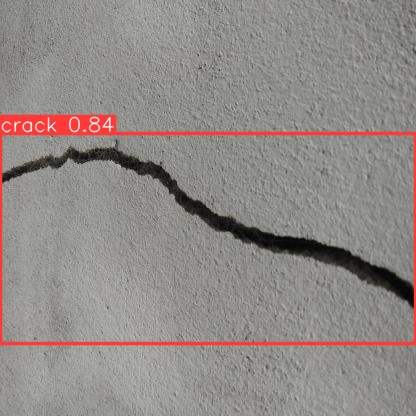

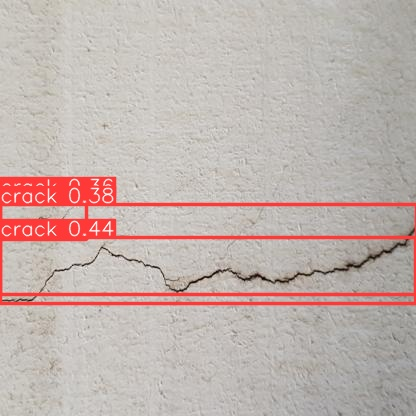

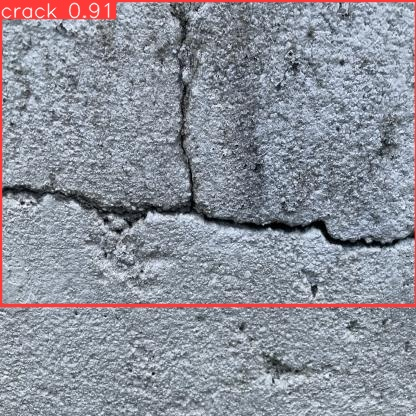

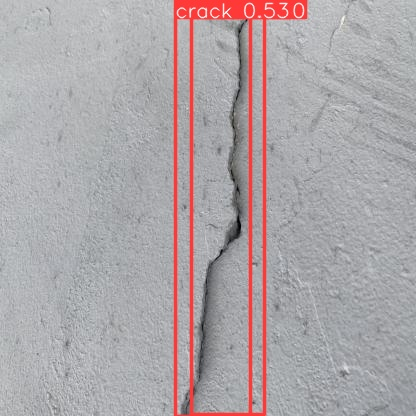

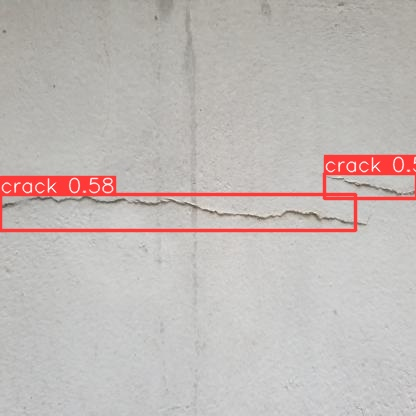

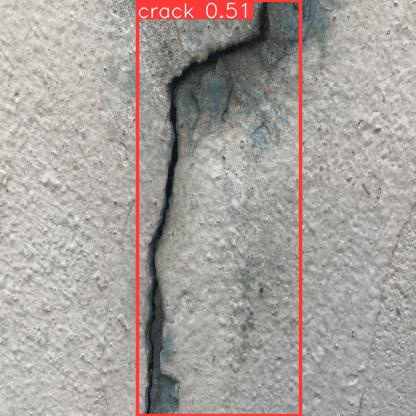

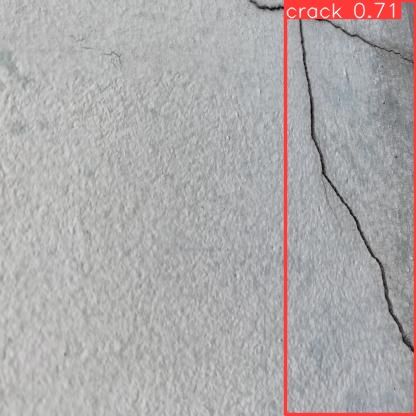

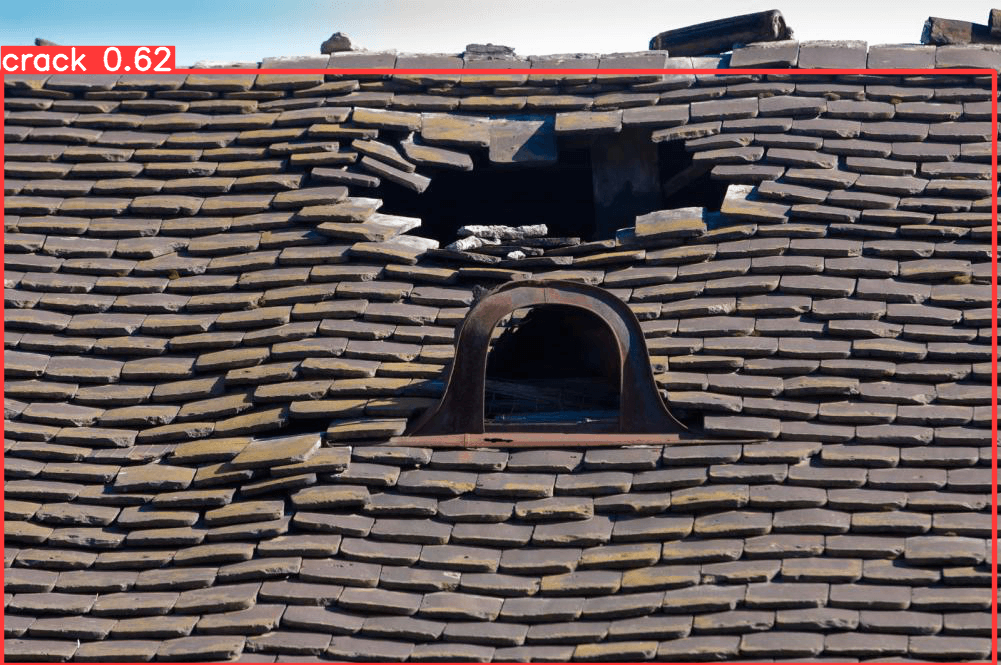

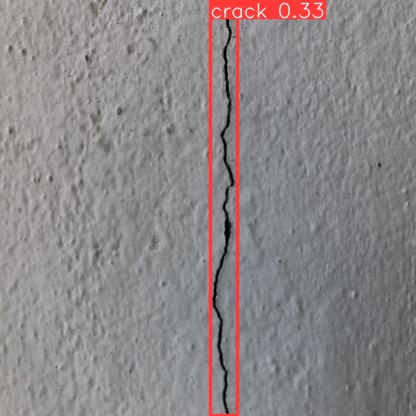

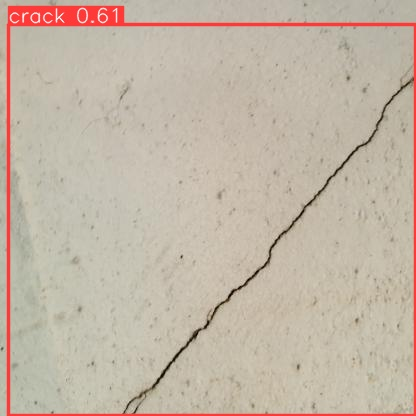

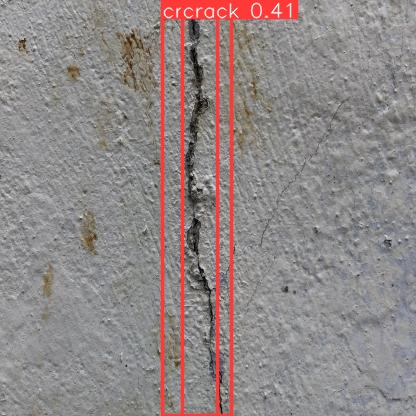

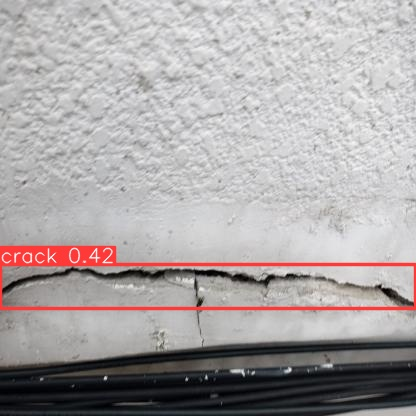

In [65]:
for image in sample(os.listdir('/kaggle/working/runs/detect/predict'), 20):
    if image.lower().endswith('.png') or image.lower().endswith('.jpg'):
        display(Image(filename = '/kaggle/working/runs/detect/predict/' + image, height = 800, width = 800))